In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

          X           y
0  1.541629  730.044365
1  0.473741  227.831985
2  0.761247  217.335793
3  0.411976  393.739808
4  0.260636 -212.825472
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       8000 non-null   float64
 1   y       8000 non-null   float64
dtypes: float64(2)
memory usage: 125.1 KB
None
                 X            y
count  8000.000000  8000.000000
mean      0.986104   369.132062
std       0.575674   275.293984
min       0.000023  -582.499540
25%       0.487163   183.277502
50%       0.983733   361.160097
75%       1.475804   541.218779
max       1.999435  1977.236222


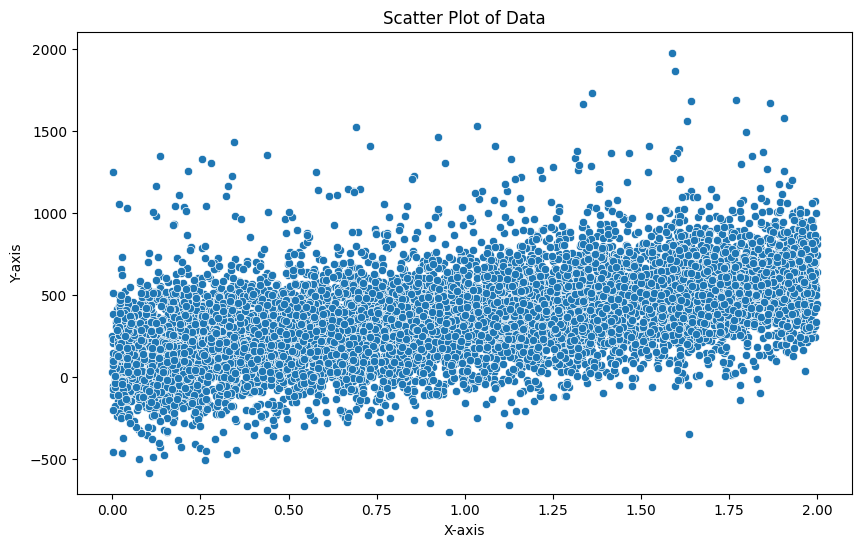

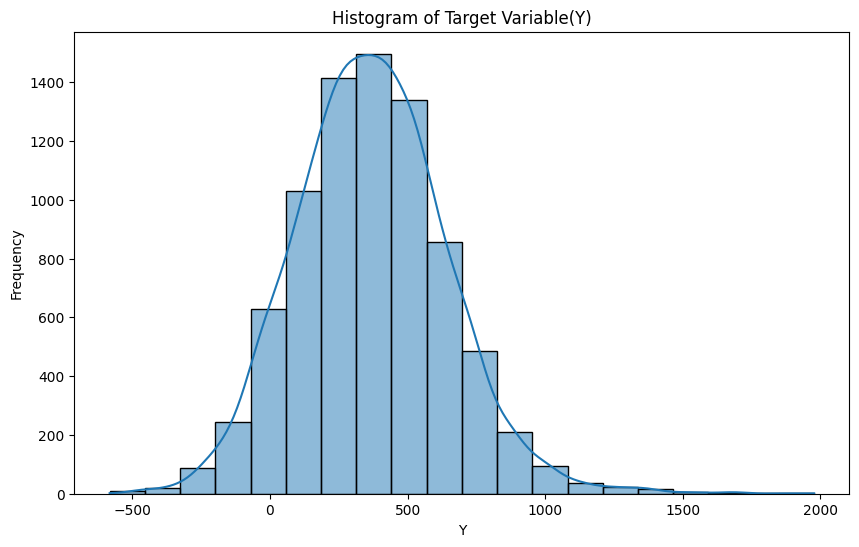

In [5]:
data = pd.read_csv('data.csv')
print(data.head())
print(data.info())
print(data.describe())

#Scatter plot of data
plt.figure(figsize=(10,6))
sns.scatterplot(x='X', y='y', data= data)
plt.title ('Scatter Plot of Data')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.show()

#Histogram of target variable ('y')
plt.figure(figsize=(10,6))
sns.histplot(data['y'], bins=20, kde=True)
plt.title('Histogram of Target Variable(Y)')
plt.xlabel('Y')
plt.ylabel('Frequency')
plt.show()

In [6]:
#removing outliers - IQR based method
Q1 = data['y'].quantile(0.25)
Q3 = data['y'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['y'] < lower_bound) | (data['y'] > upper_bound)]
print(outliers)
#remove outliers
data_cleaned = data[(data['y'] >= lower_bound) & (data['y'] <= upper_bound)]
print("Data shape after removing outliers:", data_cleaned.shape)

             X            y
126   0.114784  -488.626005
178   0.682133  1134.976120
280   1.900124  1115.755259
314   0.134569  1345.244158
410   0.135005  -428.370554
...        ...          ...
7760  0.131202  -402.929429
7871  0.351430  -441.900401
7879  1.927370  1201.098133
7926  1.361166  1730.188099
7997  0.278900  1306.580562

[108 rows x 2 columns]
Data shape after removing outliers: (7892, 2)


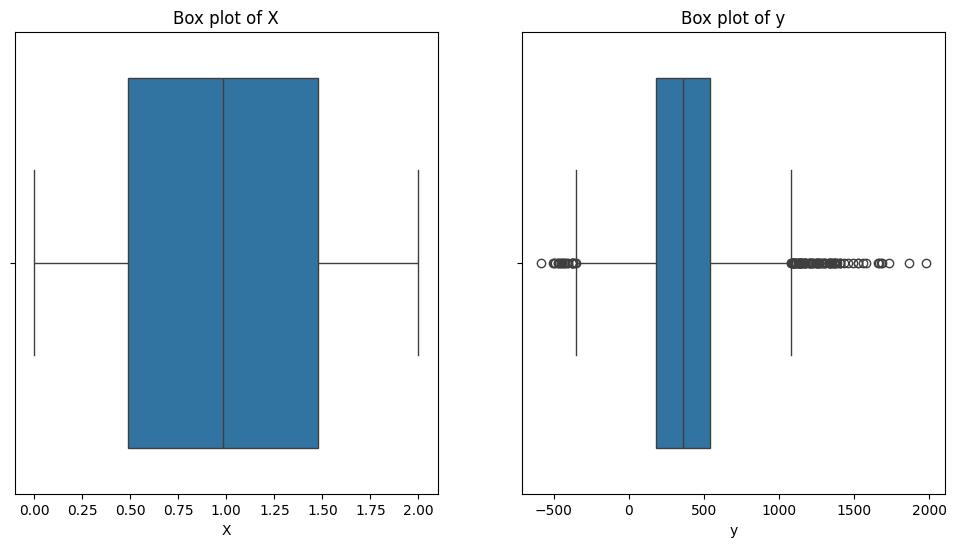

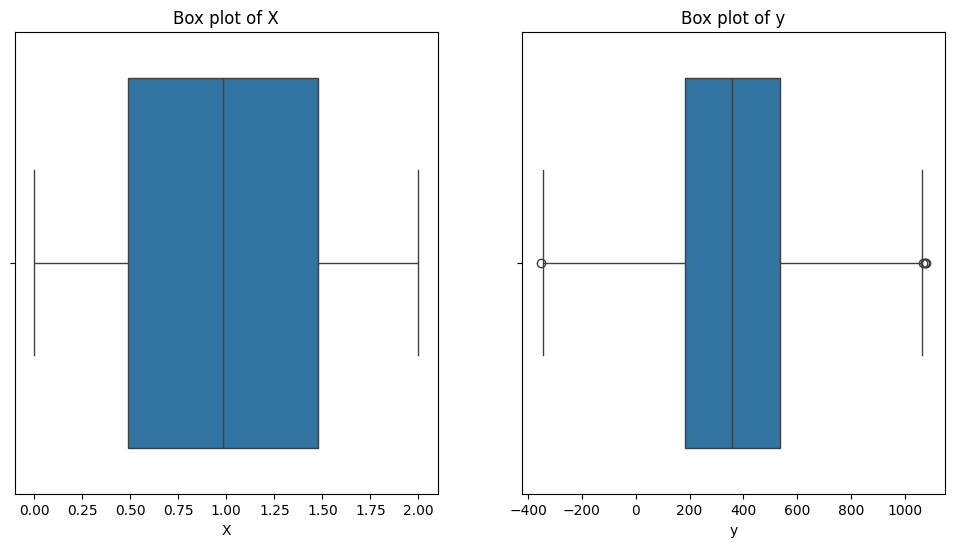

In [7]:
#Before outlier removal
plt.figure(figsize=(12, 6))
# Box plot for X
plt.subplot(1, 2, 1)
sns.boxplot(x=data['X'])
plt.title('Box plot of X')
# Box plot for y
plt.subplot(1, 2, 2)
sns.boxplot(x=data['y'])
plt.title('Box plot of y')


# After outlier removal
plt.figure(figsize=(12, 6))
# Box plot for X
plt.subplot(1, 2, 1)
sns.boxplot(x=data_cleaned['X'])
plt.title('Box plot of X')
# Box plot for y
plt.subplot(1, 2, 2)
sns.boxplot(x=data_cleaned['y'])
plt.title('Box plot of y')
plt.show()

In [8]:
#Segregating fatured and targets
X = data_cleaned[['X']].values  #Features (2D array)
y = data_cleaned['y'].values #target (1D array)
# Normalisation
scaler = StandardScaler() #initialise scalar
X_scaled = scaler.fit_transform(X) #fit and transform to features
X_scaled = np.c_[np.ones(X_scaled.shape[0]), X_scaled] # Adding column of 1s as intercept term
# Splitting data into training and Validation Sets
# training = 0.8, validation(test) = 0.2  (random_state -> reproduciblity of split)
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#shape of split data
print("Shape of y_train:", y_train.shape)
print("Shape of y_val:", y_val.shape)

Shape of y_train: (6313,)
Shape of y_val: (1579,)


In [9]:
# Linear Regression with Batch Gradient Descent

theta = np.zeros(X_train.shape[1])           #initialise parameters (theta) with weights - 00 (intercept) 01(Slope)

def hypothesis(X, theta):                     # as a simple linear function : h(x) = theta_0 + theta_1*x
  return np.dot(X, theta)                     # in matrix form : h(X) = X*theta

def compute_cost(X,y,theta):                  # Defining cost function : J(theta) = (1/2m) * sum((h(x) - y)^2)
  m = len(y)
  J = (1/(2*m)) * np.sum((hypothesis(X,theta)-y)**2)
  return J

def gradient_descent(X, y, theta, learning_rate, num_epochs):
  print(f'Gradient Descent:')
  m = len(y)
  cost_history = []
  for epoch in range(num_epochs):
    predictions = hypothesis(X, theta)
    error = predictions - y
    gradient = (1/m) * np.dot(X.T, error)
    theta -= learning_rate * gradient         # updating batch gradient descent : theta' = theta - lr * d(J(theta))/d(theta)
    cost = compute_cost(X, y, theta)          # Calculate cost for this iteration and store
    cost_history.append(cost)
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Cost: {cost}')
    if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-5:   # Checking convergence
      print(f'Converged at epoch {epoch}')
      break

  print(f'Final Cost: {cost}')
  return theta, cost_history

In [10]:
# running BGD
learning_rate = 0.01
num_epochs = 1000
theta_bgd, cost_history_bgd = gradient_descent(X_train, y_train, theta, learning_rate, num_epochs)
print("Batch Gradient Descent Theta:", theta_bgd)

Gradient Descent:
Epoch 0, Cost: 97408.27252960915
Epoch 100, Cost: 33614.2707302613
Epoch 200, Cost: 25176.902561769715
Epoch 300, Cost: 24060.609805393517
Epoch 400, Cost: 23912.871179733436
Epoch 500, Cost: 23893.31177462794
Epoch 600, Cost: 23890.721394073586
Epoch 700, Cost: 23890.37821685406
Epoch 800, Cost: 23890.332736818844
Epoch 900, Cost: 23890.32670746175
Converged at epoch 932
Final Cost: 23890.326268568548
Batch Gradient Descent Theta: [361.12577793 136.58323554]


In [11]:
def stochastic_gradient_descent(X, y, theta, learning_rate, num_epochs, batch_size):
  print(f'Stochastic Gradient Decent:')
  m = len(y)
  num_batches = int(np.ceil(m / batch_size))
  cost_history = []

  for epoch in range(num_epochs):
    indices = np.random.permutation(m)                      # Shuffle the data at the start of each epoch
    X_shuffled = X[indices]
    y_shuffled = y[indices]

    cost_epoch = 0

    for batch_idx in range(num_batches):
      start_idx = batch_idx * batch_size
      end_idx = (batch_idx + 1) * batch_size
      if end_idx > m:
        end_idx = m

      X_batch = X_shuffled[start_idx:end_idx]               # mini-batches
      y_batch = y_shuffled[start_idx:end_idx]

      predictions = hypothesis(X_batch, theta)              # Prediction for the batch and error
      error = predictions - y_batch
      gradient = (1/batch_size) * np.dot(X_batch.T, error)  # Gradient calculation for the batch
      theta -= learning_rate * gradient
      cost = compute_cost(X_batch, y_batch, theta)          # Cost calculation for current mini-batch
      cost_epoch += cost

    cost_epoch /= num_batches
    cost_history.append(cost_epoch)                         # Append average cost of the epoch to cost_history

    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Cost: {cost_epoch}')

    if epoch > 0 and abs(cost_history[-2] - cost_history[-1]) < 1e-5:   # Checking convergence
      print(f'Converged at epoch {epoch}')
      break

  print(f'Final Cost: {cost_epoch}')
  return theta, cost_history

In [12]:
#running SGD
learning_rate = 0.01
num_epochs = 1000
batch_size = 32
theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, theta, learning_rate, num_epochs, batch_size)
print("Stochastic Gradient Descent Theta:", theta_sgd)

Stochastic Gradient Decent:
Epoch 0, Cost: 23953.915625831454
Epoch 100, Cost: 23813.954294012576
Epoch 200, Cost: 23903.078507109058
Epoch 300, Cost: 23831.61396658286
Epoch 400, Cost: 23870.96046083721
Epoch 500, Cost: 23894.530260171916
Epoch 600, Cost: 23921.038787894307
Epoch 700, Cost: 23838.04480736107
Epoch 800, Cost: 23838.183602488712
Epoch 900, Cost: 23804.23595109963
Final Cost: 23883.241853402782
Stochastic Gradient Descent Theta: [362.57855987 135.58984147]


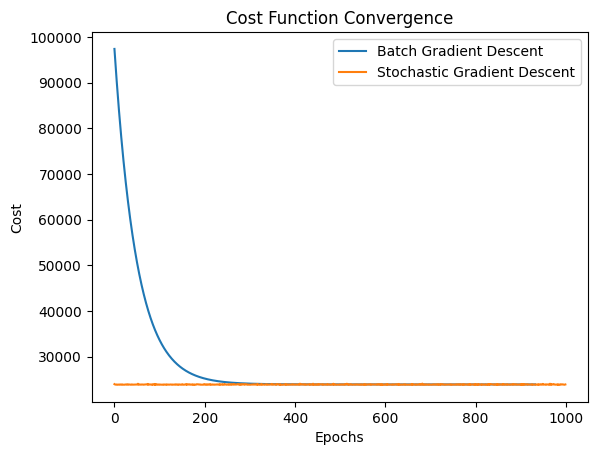

In [13]:
# COMPARING COST HISTORIES FOR BATCH AND STOCHASTIC GRADIENT DESCENT
plt.plot(cost_history_bgd, label='Batch Gradient Descent')
plt.plot(cost_history_sgd, label='Stochastic Gradient Descent')
plt.xlabel('Epochs')
#plt.yscale('log')
plt.ylabel('Cost')
plt.legend()
plt.title('Cost Function Convergence')
plt.show()

MSE on validation data (BGD): 44774.715730943826
MSE on validation data (SGD): 44774.715730943826


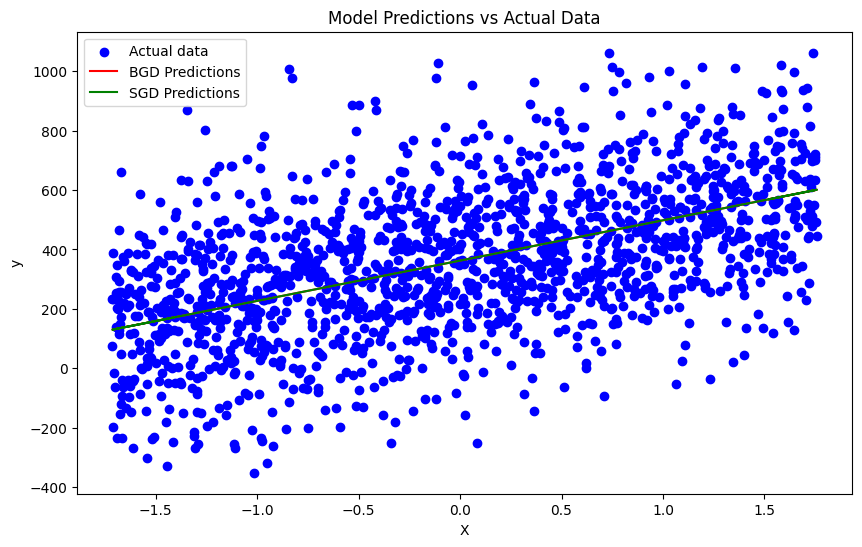

In [14]:
#performance evaluation
# Function to calculate Mean Squared Error (MSE)
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

# Predictions and MSE for BGD
y_pred_bgd = hypothesis(X_val, theta_bgd)
mse_bgd = mean_squared_error(y_val, y_pred_bgd)
print(f'MSE on validation data (BGD): {mse_bgd}')

# Predictions and MSE for SGD
y_pred_sgd = hypothesis(X_val, theta_sgd)
mse_sgd = mean_squared_error(y_val, y_pred_sgd)
print(f'MSE on validation data (SGD): {mse_sgd}')

# Plot predictions vs actual data
plt.figure(figsize=(10,6))
plt.scatter(X_val[:, 1], y_val, label='Actual data', color='blue')
plt.plot(X_val[:, 1], y_pred_bgd, label='BGD Predictions', color='red')
plt.plot(X_val[:, 1], y_pred_sgd, label='SGD Predictions', color='green')
plt.title('Model Predictions vs Actual Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()


Stochastic Gradient Decent:
Epoch 0, Cost: 23807.3996668135
Epoch 100, Cost: 23237.3765566447
Epoch 200, Cost: 23168.630641229473
Epoch 300, Cost: 23208.16549778719
Epoch 400, Cost: 23197.45195012043
Epoch 500, Cost: 23183.570494822743
Epoch 600, Cost: 23219.47308089064
Epoch 700, Cost: 23216.427333907875
Epoch 800, Cost: 23204.36039906989
Epoch 900, Cost: 23163.539811623676
Final Cost: 23204.17695334766
Stochastic Gradient Decent:
Epoch 0, Cost: 33163.34033503153
Epoch 100, Cost: 23872.4986931938
Epoch 200, Cost: 23847.267753300523
Epoch 300, Cost: 23883.14953738415
Epoch 400, Cost: 23845.958740312682
Epoch 500, Cost: 23839.175148533424
Epoch 600, Cost: 23852.8325190295
Epoch 700, Cost: 23842.157720536572
Epoch 800, Cost: 23866.331264490367
Epoch 900, Cost: 23859.18224299706
Final Cost: 23826.120851763695
Stochastic Gradient Decent:
Epoch 0, Cost: 42244.195801745496
Epoch 100, Cost: 23892.696349597987
Epoch 200, Cost: 23833.70547015602
Epoch 300, Cost: 23837.508467058462
Epoch 400, Co

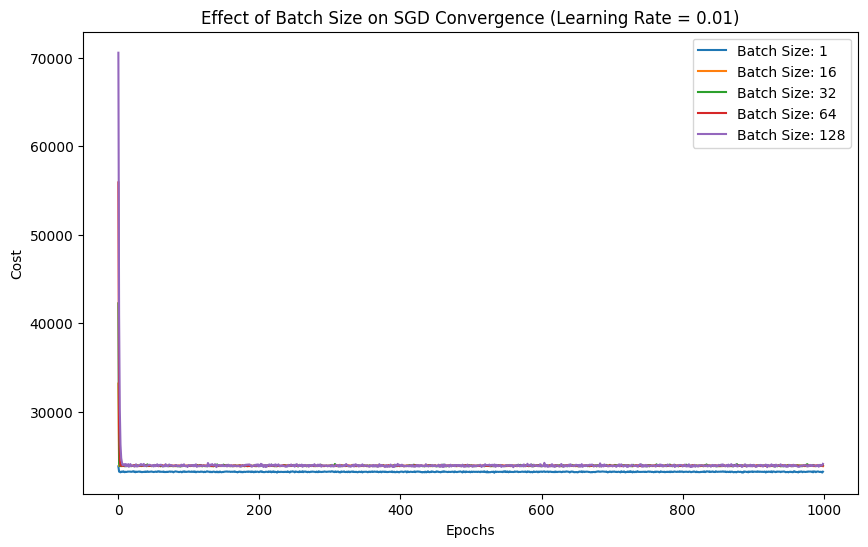

Stochastic Gradient Decent:
Epoch 0, Cost: 25189.49901237683
Epoch 100, Cost: 23653.129283581286
Epoch 200, Cost: 23664.996661818423
Epoch 300, Cost: 23719.666403431445
Epoch 400, Cost: 23690.793848493075
Epoch 500, Cost: 23658.85839958939
Epoch 600, Cost: 23674.945979821587
Epoch 700, Cost: 23608.125006455906
Epoch 800, Cost: 23682.508418503527
Epoch 900, Cost: 23609.461847764134
Final Cost: 23644.23472857915
Stochastic Gradient Decent:
Epoch 0, Cost: 42120.42318526279
Epoch 100, Cost: 23906.365683396205
Epoch 200, Cost: 23833.691149358416
Epoch 300, Cost: 23918.437338535416
Epoch 400, Cost: 23843.764489331552
Epoch 500, Cost: 23876.780563439013
Epoch 600, Cost: 24060.21701604208
Epoch 700, Cost: 23886.319775968586
Epoch 800, Cost: 23853.025697377347
Epoch 900, Cost: 23914.984971973456
Final Cost: 23812.405167178833
Stochastic Gradient Decent:
Epoch 0, Cost: 85810.44503327027
Epoch 100, Cost: 23923.518598821545
Epoch 200, Cost: 23888.95636159035
Epoch 300, Cost: 23852.804475275152
Epo

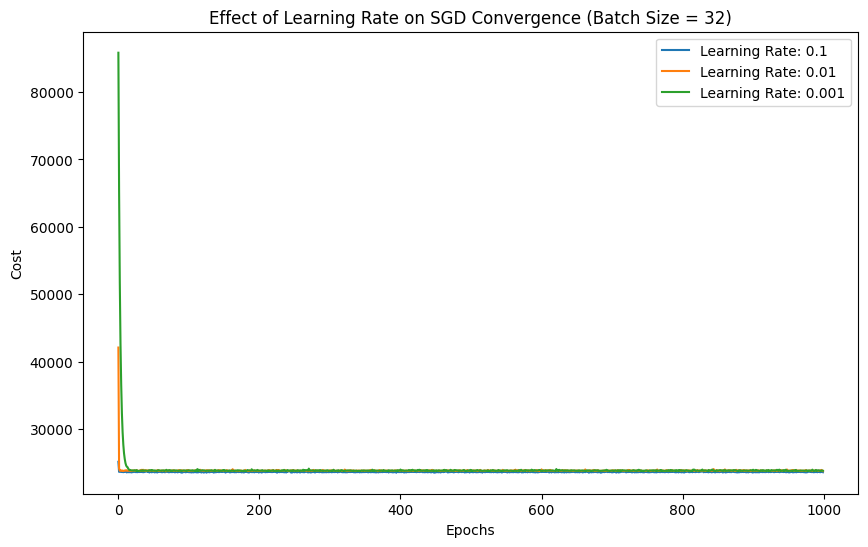

In [15]:
# Function to run SGD with different batch sizes and learning rates
def test_sgd_with_varied_params(X_train, y_train, theta, learning_rate, num_epochs, batch_size):
    theta_sgd, cost_history_sgd = stochastic_gradient_descent(X_train, y_train, theta, learning_rate, num_epochs, batch_size)
    return theta_sgd, cost_history_sgd

# Parameters for experimentation
batch_sizes = [1, 16, 32, 64, 128]
learning_rates = [0.1, 0.01, 0.001]
num_epochs = 1000

# Visualizing the effect of different batch sizes
plt.figure(figsize=(10, 6))
for batch_size in batch_sizes:
    theta_sgd, cost_history_sgd = test_sgd_with_varied_params(X_train, y_train, np.zeros(X_train.shape[1]), 0.01, num_epochs, batch_size)
    plt.plot(cost_history_sgd, label=f'Batch Size: {batch_size}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Effect of Batch Size on SGD Convergence (Learning Rate = 0.01)')
plt.legend()
plt.show()

# Visualizing the effect of different learning rates
plt.figure(figsize=(10, 6))
for lr in learning_rates:
    theta_sgd, cost_history_sgd = test_sgd_with_varied_params(X_train, y_train, np.zeros(X_train.shape[1]), lr, num_epochs, 32)
    plt.plot(cost_history_sgd, label=f'Learning Rate: {lr}')

plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Effect of Learning Rate on SGD Convergence (Batch Size = 32)')
plt.legend()
plt.show()


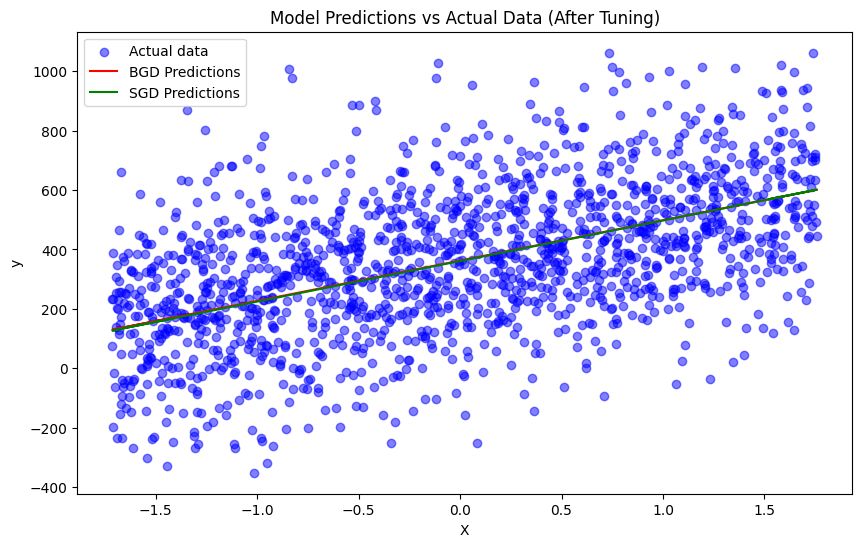

In [16]:
# Plot predictions vs actual data for BGD and SGD after tuning
plt.figure(figsize=(10, 6))
plt.scatter(X_val[:, 1], y_val, label='Actual data', color='blue', alpha=0.5)
plt.plot(X_val[:, 1], hypothesis(X_val, theta_bgd), label='BGD Predictions', color='red')
plt.plot(X_val[:, 1], hypothesis(X_val, theta_sgd), label='SGD Predictions', color='green')
plt.title('Model Predictions vs Actual Data (After Tuning)')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()
